In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# Lire les données
file_path = 'C:/Users/DELL/Desktop/YouCode Projet/data-sell4all.csv'
df = pd.read_csv(file_path)

In [70]:
# Afficher les 5 premières lignes 
print(df.head(65))

                 Pays           Age         Genre Dépenses des clients
0              France             32       Female               150.50
1             Germany             45         Male               200.75
2               Spain             28       Female                75.25
3               Italy             39         Male               180.00
4                  UK             52       Female               250.30
..                ...            ...          ...                  ...
60      Digital Realm            NaN           AI           1010101.01
61         Multiverse              ∞   Non-Binary                    π
62              Error        #VALUE!          404              #DIV/0!
63      Greece, Italy          25;30  Male;Female              100+200
64   United  Kingdom   Not Available        Other            Priceless

[65 rows x 4 columns]


In [71]:
# Afficher le nombre de lignes et les colonnes
num_rows = df.shape[0]
columns = df.columns.tolist()
print(f"\nNombre de lignes: {num_rows}")
print(f"Colonnes du fichier Excel: {columns}")


Nombre de lignes: 65
Colonnes du fichier Excel: ['Pays', ' Age ', 'Genre', 'Dépenses des clients']


In [72]:
# Resume technique des donnees fourni ou bien diponibles

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1    Age                  63 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  64 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


## Explication du Résumé Technique

- **Type d'objet** : `DataFrame` (structure de données en tableau).
- **Entrées** : 65 lignes, indexées de 0 à 64.
- **Colonnes** : 4 au total.
  - `Pays` : 65 valeurs non nulles (type `object`).
  - `Age` : 63 valeurs non nulles, 2 valeurs manquantes (type `object`).
  - `Genre` : 64 valeurs non nulles, 1 valeur manquante (type `object`).
  - `Dépenses des clients` : 64 valeurs non nulles, 1 valeur manquante (type `object`).
- **Utilisation mémoire** : 2.2+ KB.

**Remarques** : Les colonnes `Age` et `Dépenses des clients` devraient être nettoyées pour convertir les valeurs en types numériques appropriés (`int64` ou `float64`). Les valeurs manquantes doivent être gérées pour éviter des problèmes lors des analyses.


In [73]:
df.columns = df.columns.str.strip()

df['Age'] = pd.to_numeric(df['Age'] , errors='coerce')
df['Dépenses des clients'] = pd.to_numeric(df['Dépenses des clients'] , errors='coerce')

# Suppression des valeurs pas numeriques
df_cleaned = df.dropna(subset=['Age'])
df_cleaned = df.dropna(subset=['Dépenses des clients'])

# Calcul de la médiane et de la moyenne
median_age = df_cleaned['Age'].median()
mean_age = df_cleaned['Age'].mean()
median_spending = df_cleaned['Dépenses des clients'].median()
mean_spending = df_cleaned['Dépenses des clients'].mean()

print(f"Médiane de l'âge: {median_age}")
print(f"Moyenne de l'âge: {mean_age}")
print(f"Médiane des dépenses des clients: {median_spending}")
print(f"Moyenne des dépenses des clients: {mean_spending}")

Médiane de l'âge: 36.5
Moyenne de l'âge: 54.232142857142854
Médiane des dépenses des clients: 167.5
Moyenne des dépenses des clients: 34811.72948275862


In [76]:
# Suppression des lignes avec moins de 10 € de dépenses
df_cleaned = df_cleaned[df_cleaned['Dépenses des clients'] >= 10]

# Suppression des doublons
df_cleaned = df_cleaned.drop_duplicates()


# Sélection des colonnes à conserver
df_columns_cleaned = df_cleaned[['Pays', 'Age', 'Genre', 'Dépenses des clients']]

# Écriture des données nettoyées dans un nouveau fichier CSV
df_columns_cleaned.to_csv('C:/Users/DELL/Desktop/YouCode Projet/data-sell4all_cleaned.csv', index=False)

## Création de la visualisation

In [81]:
# Lire le fichier CSV nettoyé
df_cleaned = pd.read_csv('C:/Users/DELL/Desktop/YouCode Projet/data-sell4all_cleaned.csv')

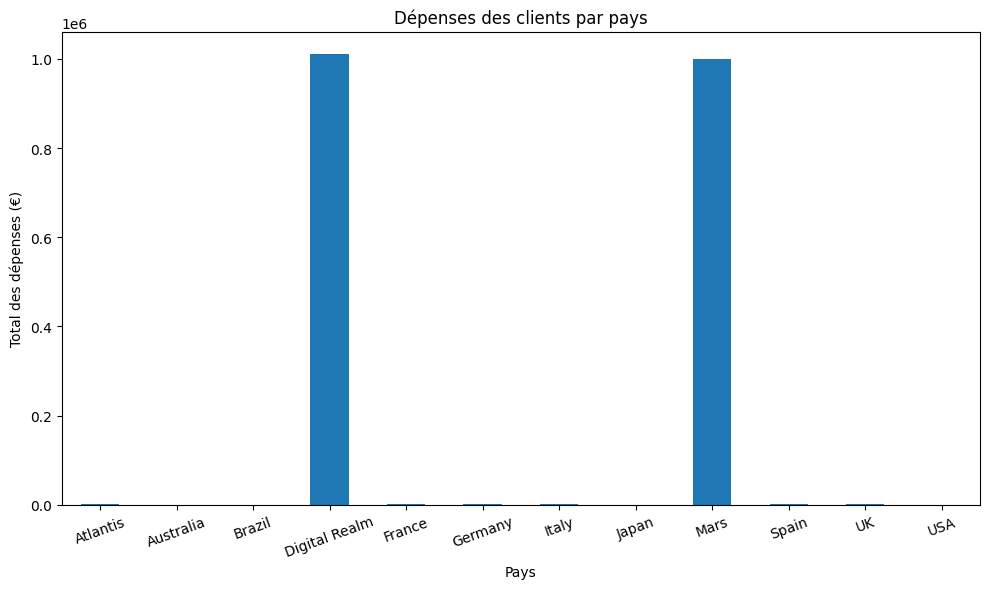

In [86]:
# Grouper les données par pays et sommer les dépenses
df_grouped = df_cleaned.groupby('Pays')['Dépenses des clients'].sum()

# Création du graphique à barres
plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar')
plt.title('Dépenses des clients par pays')
plt.xlabel('Pays')
plt.ylabel('Total des dépenses (€)')
plt.xticks(rotation=20)
plt.tight_layout()

# Affichage du graphique
plt.show()